In [16]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [17]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [18]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [19]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

591

In [20]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [21]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ponta do sol
Processing Record 2 of Set 1 | alofi
Processing Record 3 of Set 1 | ouallam
Processing Record 4 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 5 of Set 1 | beaverlodge
Processing Record 6 of Set 1 | mataura
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | mitu
Processing Record 9 of Set 1 | bereda
Processing Record 10 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 11 of Set 1 | yellowknife
Processing Record 12 of Set 1 | hasaki
Processing Record 13 of Set 1 | tiksi
Processing Record 14 of Set 1 | faanui
Processing Record 15 of Set 1 | nara
Processing Record 16 of Set 1 | dikson
Processing Record 17 of Set 1 | hermanus
Processing Record 18 of Set 1 | castro
Processing Record 19 of Set 1 | borba
Processing Record 20 of Set 1 | honningsvag
Processing Record 21 of Set 1 | erzin
Processing Record 22 of Set 1 | bengka

Processing Record 40 of Set 4 | torbay
Processing Record 41 of Set 4 | upernavik
Processing Record 42 of Set 4 | dinghai
Processing Record 43 of Set 4 | lillooet
Processing Record 44 of Set 4 | kapit
Processing Record 45 of Set 4 | baghdad
Processing Record 46 of Set 4 | sechura
Processing Record 47 of Set 4 | chokurdakh
Processing Record 48 of Set 4 | chitral
Processing Record 49 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 50 of Set 4 | tierranueva
Processing Record 1 of Set 5 | beringovskiy
Processing Record 2 of Set 5 | viedma
Processing Record 3 of Set 5 | dingle
Processing Record 4 of Set 5 | vaini
Processing Record 5 of Set 5 | makakilo city
Processing Record 6 of Set 5 | levelland
Processing Record 7 of Set 5 | sabang
Processing Record 8 of Set 5 | walvis bay
Processing Record 9 of Set 5 | dudinka
Processing Record 10 of Set 5 | airai
Processing Record 11 of Set 5 | namibe
Processing Record 12 of Set 5 | tabiauea
City not found. Skipping...
Processing 

Processing Record 31 of Set 8 | pisco
Processing Record 32 of Set 8 | iralaya
Processing Record 33 of Set 8 | zhezkazgan
Processing Record 34 of Set 8 | tuatapere
Processing Record 35 of Set 8 | salinas
Processing Record 36 of Set 8 | york
Processing Record 37 of Set 8 | phan rang
City not found. Skipping...
Processing Record 38 of Set 8 | riverton
Processing Record 39 of Set 8 | bourail
Processing Record 40 of Set 8 | palana
Processing Record 41 of Set 8 | hunza
City not found. Skipping...
Processing Record 42 of Set 8 | kamenskoye
City not found. Skipping...
Processing Record 43 of Set 8 | laredo
Processing Record 44 of Set 8 | kuching
Processing Record 45 of Set 8 | salinopolis
Processing Record 46 of Set 8 | ayia marina
Processing Record 47 of Set 8 | marcona
City not found. Skipping...
Processing Record 48 of Set 8 | bosaso
Processing Record 49 of Set 8 | nishihara
Processing Record 50 of Set 8 | san juan
Processing Record 1 of Set 9 | klaksvik
Processing Record 2 of Set 9 | kunun

Processing Record 16 of Set 12 | luderitz
Processing Record 17 of Set 12 | kovdor
Processing Record 18 of Set 12 | barra dos coqueiros
Processing Record 19 of Set 12 | ouahigouya
Processing Record 20 of Set 12 | harper
Processing Record 21 of Set 12 | pahalgam
Processing Record 22 of Set 12 | sakakah
Processing Record 23 of Set 12 | constitucion
Processing Record 24 of Set 12 | nazira
Processing Record 25 of Set 12 | cumaribo
City not found. Skipping...
Processing Record 26 of Set 12 | sangar
Processing Record 27 of Set 12 | pochutla
Processing Record 28 of Set 12 | neuquen
Processing Record 29 of Set 12 | kuche
City not found. Skipping...
Processing Record 30 of Set 12 | olhao
Processing Record 31 of Set 12 | bonga
Processing Record 32 of Set 12 | torrelavega
Processing Record 33 of Set 12 | padang
Processing Record 34 of Set 12 | jacksonville
Processing Record 35 of Set 12 | bako
Processing Record 36 of Set 12 | sambava
Processing Record 37 of Set 12 | stillwater
Processing Record 38

In [22]:
len(city_data)

539

In [23]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ponta Do Sol,32.67,-17.10,68.00,68,40,6.93,PT,2020-05-09 21:54:28
1,Alofi,-19.06,-169.92,82.40,78,58,9.17,NU,2020-05-09 21:54:28
2,Ouallam,14.32,2.09,87.67,25,23,1.30,NE,2020-05-09 21:54:28
3,Beaverlodge,55.22,-119.44,53.60,32,20,17.22,CA,2020-05-09 21:54:28
4,Mataura,-46.19,168.86,51.67,72,48,3.91,NZ,2020-05-09 21:54:28
5,Punta Arenas,-53.15,-70.92,44.60,87,90,3.36,CL,2020-05-09 21:50:05
6,Mitu,1.20,-70.17,78.39,95,98,0.56,CO,2020-05-09 21:54:28
7,Bereda,43.27,-7.54,57.99,100,98,1.99,ES,2020-05-09 21:54:28
8,Yellowknife,62.46,-114.35,35.60,51,20,11.41,CA,2020-05-09 21:54:28
9,Hasaki,35.73,140.83,66.20,88,75,5.82,JP,2020-05-09 21:54:28


In [24]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ponta Do Sol,PT,2020-05-09 21:54:28,32.67,-17.10,68.00,68,40,6.93
1,Alofi,NU,2020-05-09 21:54:28,-19.06,-169.92,82.40,78,58,9.17
2,Ouallam,NE,2020-05-09 21:54:28,14.32,2.09,87.67,25,23,1.30
3,Beaverlodge,CA,2020-05-09 21:54:28,55.22,-119.44,53.60,32,20,17.22
4,Mataura,NZ,2020-05-09 21:54:28,-46.19,168.86,51.67,72,48,3.91
5,Punta Arenas,CL,2020-05-09 21:50:05,-53.15,-70.92,44.60,87,90,3.36
6,Mitu,CO,2020-05-09 21:54:28,1.20,-70.17,78.39,95,98,0.56
7,Bereda,ES,2020-05-09 21:54:28,43.27,-7.54,57.99,100,98,1.99
8,Yellowknife,CA,2020-05-09 21:54:28,62.46,-114.35,35.60,51,20,11.41
9,Hasaki,JP,2020-05-09 21:54:28,35.73,140.83,66.20,88,75,5.82


In [25]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [26]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [28]:
# Import the time module.
import time

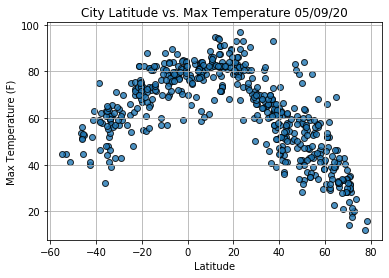

In [29]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

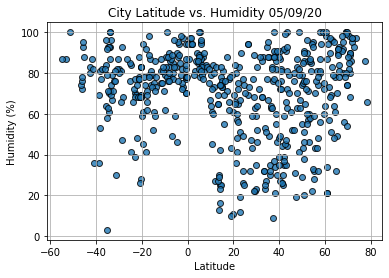

In [37]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

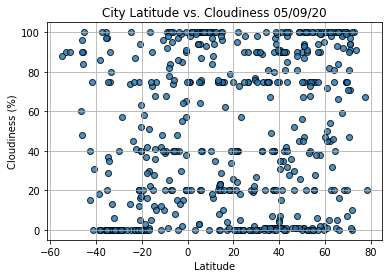

In [38]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

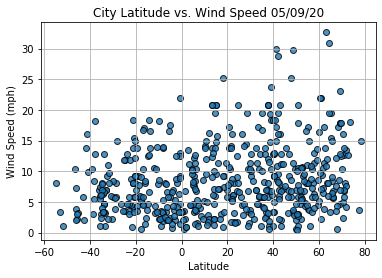

In [39]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

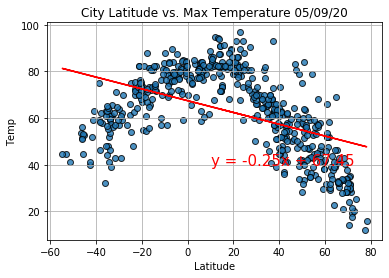

In [41]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, max_temps)

# Calculate the regression line "y values" from the slope and intercept. 
regress_values = lats * slope + intercept

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot of the x and y values.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

In [54]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [44]:
index13 = city_data_df.loc[13]
index13

City                       Dikson
Country                        RU
Date          2020-05-09 21:54:29
Lat                         73.51
Lng                         80.55
Max Temp                    25.52
Humidity                       97
Cloudiness                     91
Wind Speed                  18.03
Name: 13, dtype: object

In [46]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

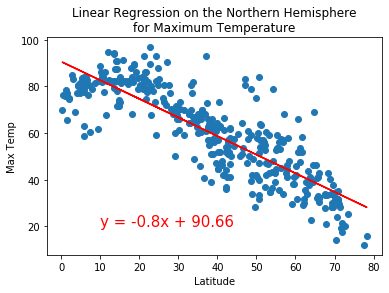

In [55]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor Maximum Temperature', 'Max Temp',(10,20))

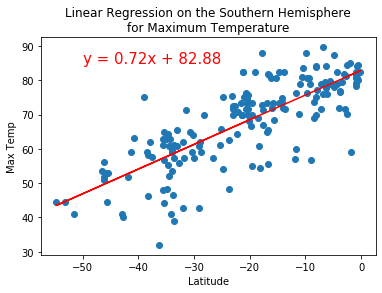

In [56]:
# Linear regression on the Northern Hemisphere
x_values_s = southern_hemi_df["Lat"]
y_values_s = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values_s, y_values_s,
                       'Linear Regression on the Southern Hemisphere\nfor Maximum Temperature', 'Max Temp',(-50,85))

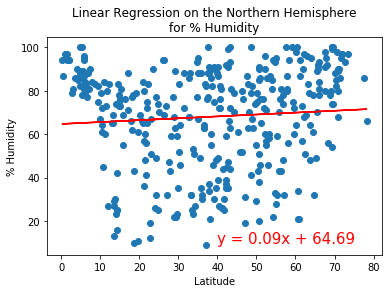

In [57]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor % Humidity', '% Humidity',(40,10))

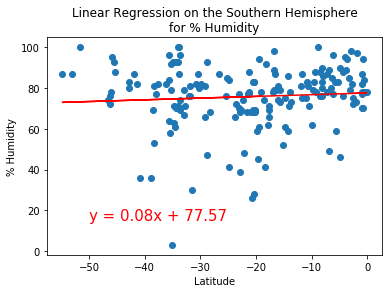

In [58]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\nfor % Humidity', '% Humidity',(-50,15))

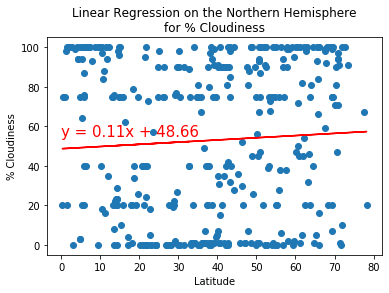

In [61]:
# Linear regression for cloudiness in the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor % Cloudiness', '% Cloudiness',(0,55))

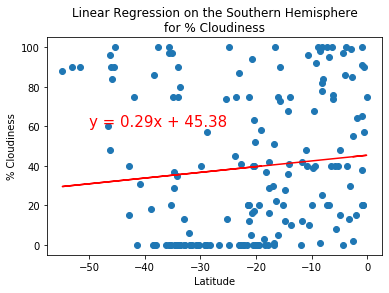

In [66]:
# Linear regression for cloudiness in the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\nfor % Cloudiness', '% Cloudiness',(-50,60))

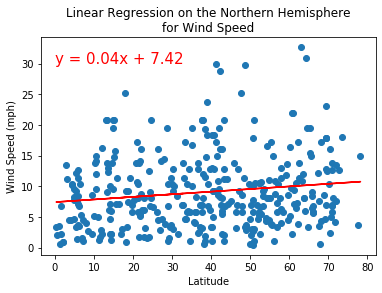

In [70]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor Wind Speed', 'Wind Speed (mph)',(0,30))

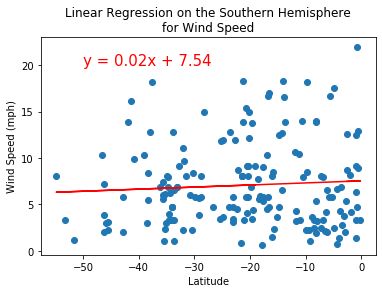

In [72]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\nfor Wind Speed', 'Wind Speed (mph)',(-50,20))